## 22.45 Redes Neuronales - 2020 2Q
# Trabajo Práctico Nº1: Clasificador Bayesiano
### Rocío Parra


En el presente trabajo se utilizará un clasificador bayesiano para predecir si una persona es hombre o mujer, sabiendo únicamente su peso y su altura. Para esto se cuenta con una base de datos con el sexo y las medidas de una población, separada en una parte que será utilizada para estimar los parámetros necesarios, y otra con la que se probará la efectividad del algoritmo.

A continuación se observa una pequeña muestra de la información con la que se cuenta.

In [1]:
from helper import get_stats, plot_hist_and_gaussian, test, head, plot_errors
head()

,Genero,Peso,Altura
7620,Mujer,61.235,162.402
1837,Hombre,97.432,181.908
3311,Hombre,73.324,172.459
9478,Mujer,55.193,157.748
7805,Mujer,56.886,151.798


## Probabilidades a priori

El clasificador bayesiano propuesto requiere el cálculo de las siguientes probabilidades:
- Probabilidad de que el sexo de una persona $X$ sea $x$: $P(X=x)$
- Probabilidad de que la altura y el peso $\vec{M}= (Peso, Altura)$ de una persona sean $\vec{m}=(peso, altura)$: $P(\vec{M}=\vec{m})$
- Probabilidad de que una persona tenga las medidas $\vec{m}$ sabiendo que su sexo es $x$: $P(\vec{M}=\vec{m} / X=x)$

Teniendo estas probabilidades, para obtener la probabilidad de que una persona sea hombre o mujer dadas sus medidas, utilizando el teorema de Bayes se obtiene que:

$$
P(X=x/\vec{M}=\vec{m}) = \frac{P(\vec{M}=\vec{m}/X=x) \cdot P(X=x)}{P(\vec{M}=\vec{m})}
$$ 

Para el caso de $P(X=x)$, basta calcular qué fracción de la población es de cada sexo. 

El caso de la altura y el peso, sin embargo, es más complicado. No sólo es $\vec{m}$ una variable bidimensional, sino que además su espacio muestral es continuo. Para solucionar el problema de la continuidad, como el número de muestras es lo suficientemente elevado, puede tratarse la distribución de cada variable como una gaussiana, estimando su media y varianza a partir de las muestras.

A su vez, se debe tener en cuenta el hecho de que el peso y la altura no son variables totalmente independientes entre sí: es esperable que una persona más alta, como tiene más volumen de músculo, tejidos, huesos, etc., sea también más pesada. Se propone entonces tratar $\vec{M}$ como dos variables conjuntamente gaussianas, estimando $\vec{\mu}$ y $\Sigma$ a partir de las muestras.

Estos dos últimos estimadores deben calcularse para toda la población, así como por separado para hombres y para mujeres, a fin de obtener las distribuciones de probabilidades ya mencionadas. Los resultados de estas estimaciones se encuentran en la siguiente tabla:

In [2]:
get_stats()

,Grupo,Probabilidad,Media peso,Desvío peso,Media altura,Desvío altura,Correlación peso-altura
0,Toda la población,1.00000,72.802476,14.624699,168.113424,9.829018,0.924378
1,Mujeres,0.49975,61.137895,8.671726,161.304713,6.897148,0.848971
2,Hombres,0.50025,84.455398,8.983019,174.915330,7.281646,0.860449


Para tener una representación visual de qué tanto representan las gaussianas a las medidas de la población, a continuación se presentan lado a lado histogramas bidimensionales obtenidos a partir de las muestras, y la gaussiana con misma $\vec{\mu}$ y $\Sigma$.


Gráficos correspondientes a toda la población


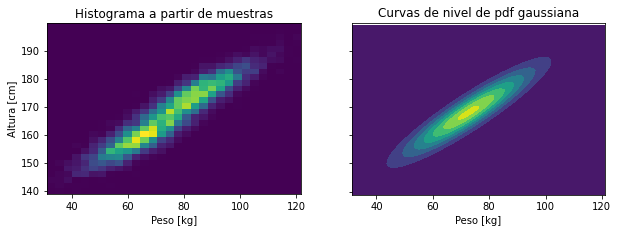


Gráficos correspondientes a mujeres


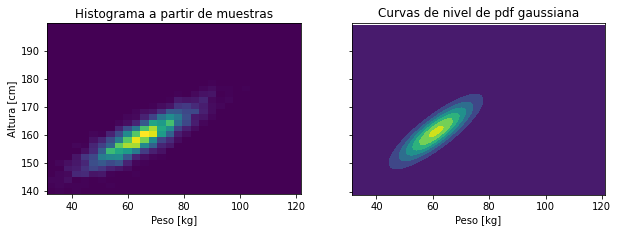


Gráficos correspondientes a hombres


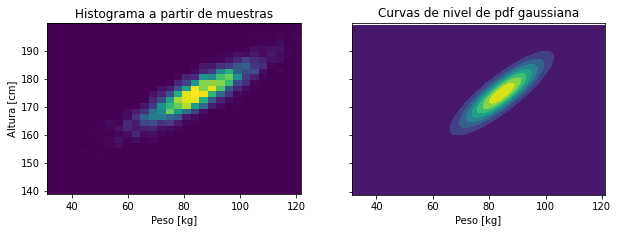

In [3]:
plot_hist_and_gaussian()

In [4]:
right_p, wrong_n, wrong_w_p = test()
print(f"Predicciones correctas: {right_p:.2%}")
print(f"De las {wrong_n} predicciones incorrectas, ",
      f"el {wrong_w_p:.2%} eran mujeres y el restante {1-wrong_w_p:.2%}, hombres.")

Predicciones correctas: 89.85%
De las 203 predicciones incorrectas,  el 53.69% eran mujeres y el restante 46.31%, hombres.


Como se puede observar de los gráficos a continuación, los errores corresponden en general a hombres cuyo peso y altura son cercanos o menores a $\vec{\mu}_{mujer}= (61kg, 161cm)$, y análogamente para mujeres con $\vec{m} \sim \vec{\mu}_{hombre}= (84.5kg, 175cm)$. 

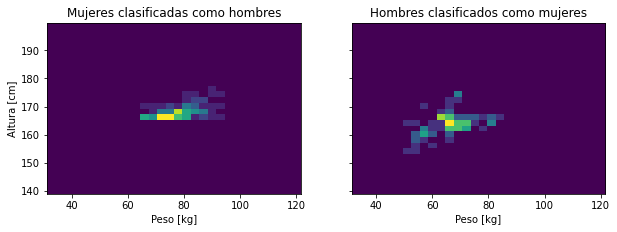

In [5]:
plot_errors()

Se concluye que el clasificador está operando de manera satisfactoria, teniendo en cuenta la información limitada con la que se cuenta. Dado que es esperable que una parte de la población femenina tenga peso y altura más típicamente encontrados en un hombre, y viceversa, para mejorar el resultado obtenido debería recurrirse a una base de datos que aporte más información sobre cada persona.